In [1]:
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
import matplotlib.pyplot as plt

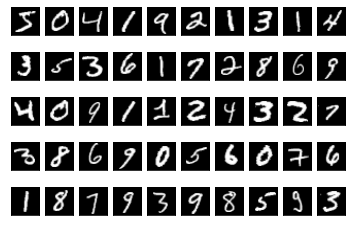

In [7]:
for digit_num in range(0,50):
    plt.subplot(5,10, digit_num+1)
    mat_data = X_train[digit_num].reshape(28,28)
    plt.imshow(mat_data, cmap = 'gray')
    plt.xticks([])
    plt.yticks([])

In [8]:
y_train[0:50]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3], dtype=uint8)

In [9]:
# Scaling images by dividing by 255
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

In [11]:
X_train.shape

(60000, 784)

In [12]:
X_test.shape

(10000, 784)

In [13]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [47]:
model = Sequential()

In [48]:
# First Hidden Layer
model.add(Dense(units=128, 
                activation='relu', 
                input_shape=(784,)))

# Second Hidden Layer
model.add(Dense(units=64, 
                activation='relu'))

# Third Hidden layer
model.add(Dense(units=32, 
                activation='relu'))

# Output Layer
model.add(Dense(units=10, 
                activation='softmax'))

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [50]:
785*128

100480

In [51]:
model.compile(optimizer= tensorflow.keras.optimizers.Adam(learning_rate=0.01), 
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [52]:
result = model.fit(X_train, 
                   y_train,
                   validation_data = (X_test, y_test),
                   batch_size=10,
                   epochs=10)

Epoch 1/10
6000/6000 [==============================] - 10s 2ms/step - loss: 0.3735 - accuracy: 0.9021 - val_loss: 0.2394 - val_accuracy: 0.9319
Epoch 2/10
6000/6000 [==============================] - 10s 2ms/step - loss: 0.2651 - accuracy: 0.9364 - val_loss: 0.2549 - val_accuracy: 0.9439
Epoch 3/10
6000/6000 [==============================] - 10s 2ms/step - loss: 0.2289 - accuracy: 0.9483 - val_loss: 0.2271 - val_accuracy: 0.9526
Epoch 4/10
6000/6000 [==============================] - 10s 2ms/step - loss: 0.2151 - accuracy: 0.9520 - val_loss: 0.1957 - val_accuracy: 0.9557
Epoch 5/10
6000/6000 [==============================] - 10s 2ms/step - loss: 0.2075 - accuracy: 0.9541 - val_loss: 0.2665 - val_accuracy: 0.9526
Epoch 6/10
6000/6000 [==============================] - 10s 2ms/step - loss: 0.2055 - accuracy: 0.9564 - val_loss: 0.2150 - val_accuracy: 0.9582
Epoch 7/10
6000/6000 [==============================] - 10s 2ms/step - loss: 0.1881 - accuracy: 0.9579 - val_loss: 0.2294 - val_ac

In [40]:
60000/32

1875.0

In [20]:
y_train_pred = np.argmax(model.predict(X_train), axis=1)

In [25]:
np.argmax(model.predict(X_train)[1])

0

In [24]:
y_test_pred = np.argmax(model.predict(X_test),axis=1)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [27]:
print("Confusion Matrix")
print(confusion_matrix(y_pred = y_train_pred, y_true=y_train))
print("\n")
print(f" Accuracy {accuracy_score(y_pred = y_train_pred, y_true=y_train)}")

Confusion Matrix
[[5903    1    3    4    0    2    1    0    2    7]
 [   0 6735    2    0    1    0    0    2    2    0]
 [   0    0 5936    3    1    0    0    6   11    1]
 [   0    2    5 6074    0    4    0    5   29   12]
 [   0    3   10    1 5759    1    0    6    0   62]
 [   0    0    0   11    0 5378    2    1   12   17]
 [   6    1    1    0    0    2 5899    0    9    0]
 [   0    6    3    0    0    0    0 6240    4   12]
 [   0   10    1    1    1    1    0    1 5820   16]
 [   0    0    1    0    0    0    0    1    2 5945]]


 Accuracy 0.9948166666666667


In [28]:
print("Confusion Matrix")
print(confusion_matrix(y_pred = y_test_pred, y_true=y_test))
print("\n")
print(f" Accuracy {accuracy_score(y_pred = y_test_pred, y_true=y_test)}")

Confusion Matrix
[[ 973    0    1    2    0    1    0    0    2    1]
 [   0 1125    4    1    0    1    1    0    3    0]
 [   3    0 1008    5    3    0    0    4    9    0]
 [   0    0    3  980    0    8    0    7    6    6]
 [   2    1    9    0  938    0    1    4    2   25]
 [   2    0    0    5    1  870    1    0    7    6]
 [   2    4    0    1    3    4  940    0    4    0]
 [   1    2    7    0    1    0    0 1003    5    9]
 [   3    0    4    4    1    3    2    4  948    5]
 [   1    3    0    1    6    3    0    2    1  992]]


 Accuracy 0.9777


In [29]:
history = pd.DataFrame(result.history)

In [30]:
history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.253444,0.925450,0.138584,0.9558
1,0.106035,0.967533,0.102466,0.9685
2,0.074128,0.977117,0.117594,0.9635
3,0.058631,0.981150,0.082492,0.9755
4,0.047308,0.984617,0.087364,0.9741


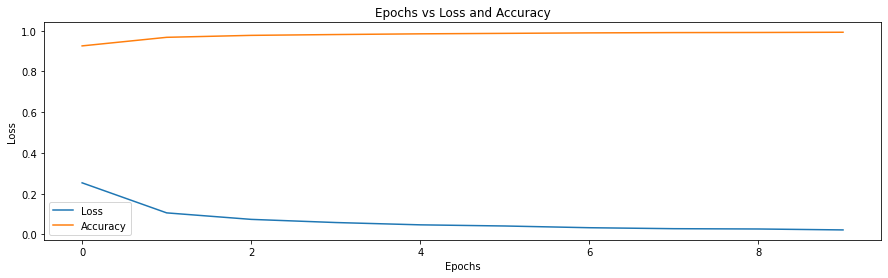

In [31]:
plt.figure(figsize = (15,4))
plt.plot(history.loss, label='Loss')
plt.plot(history.accuracy, label='Accuracy')
plt.title('Epochs vs Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

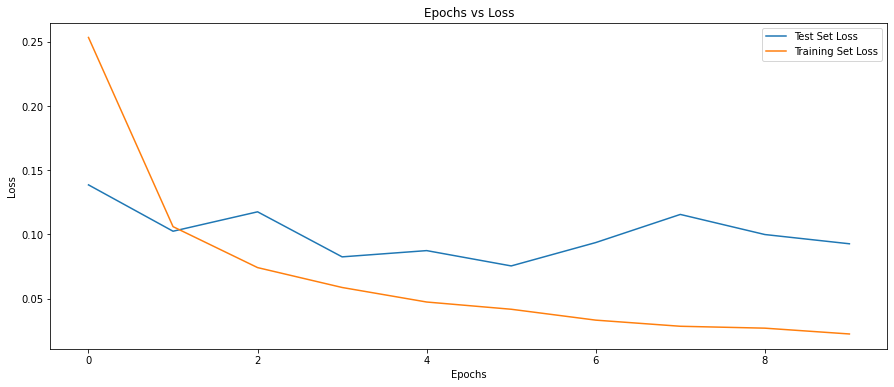

In [32]:
plt.figure(figsize = (15,6))
plt.plot(history.val_loss, label='Test Set Loss')
plt.plot(history.loss, label='Training Set Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

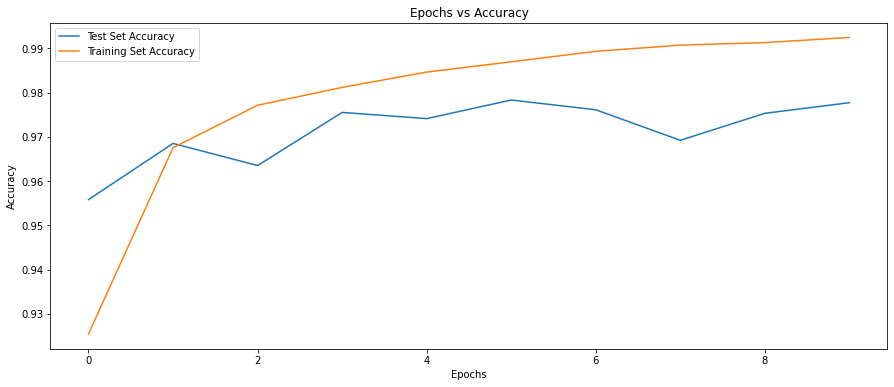

In [33]:
plt.figure(figsize = (15,6))
plt.plot(history.val_accuracy, label='Test Set Accuracy')
plt.plot(history.accuracy, label='Training Set Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()